### Ejemplo de experimentación verificando la complejidad temporal

In [277]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

fig = plt.figure()
df = pd.read_csv("runtime_random.csv")

<Figure size 640x480 with 0 Axes>

In [278]:
df.columns

Index(['n', 'n^2', 'PC', 'SPC'], dtype='object')

Text(0, 0.5, 'Tiempo [s]')

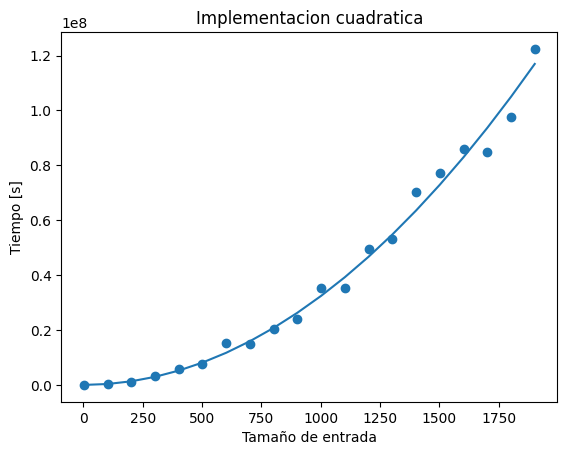

In [279]:
def n_cuadrado(x, a):
    return a * (x**2)

popt, pcov = curve_fit(n_cuadrado, df["n"], df["n^2"])
[a] = popt

plt.scatter(df["n"], df["n^2"])
plt.plot(df["n"], n_cuadrado(df["n"],a))
plt.title("Implementacion cuadratica")
plt.xlabel("Tamaño de entrada")
plt.ylabel("Tiempo [s]")

Text(0, 0.5, 'Tiempo [s]')

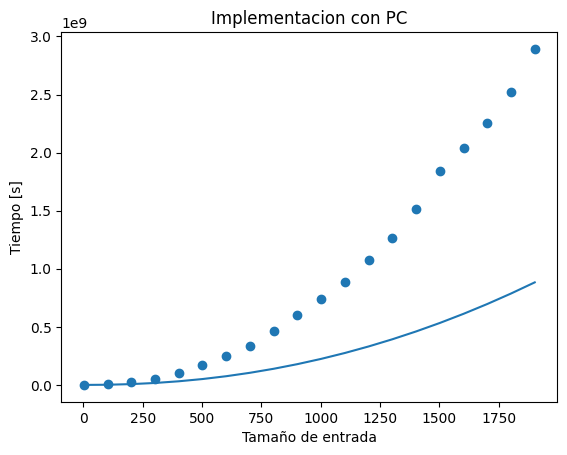

In [280]:
def mlogn_ajustado(x, a):
    return a * (x**2)*np.log(x)

popt, pcov = curve_fit(mlogn_ajustado, df["n"], df["PC"])
[a_PC] = popt

plt.scatter(df["n"], df["PC"])
plt.plot(df["n"], mlogn_ajustado(df["n"], a))
plt.title("Implementacion con PC")
plt.xlabel("Tamaño de entrada")
plt.ylabel("Tiempo [s]")

Text(0, 0.5, 'Tiempo [s]')

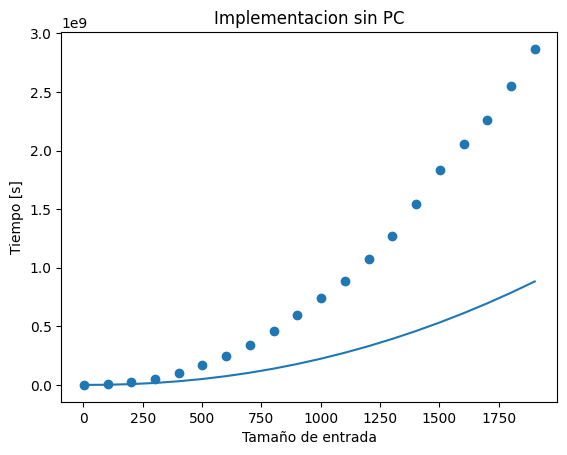

In [281]:
def mlogn_ajustado(x, a):
    return a * (x**2)*np.log(x)

popt, pcov = curve_fit(mlogn_ajustado, df["n"], df["SPC"])
[a_SPC] = popt

plt.scatter(df["n"], df["SPC"])
plt.plot(df["n"], mlogn_ajustado(df["n"], a))
plt.title("Implementacion sin PC")
plt.xlabel("Tamaño de entrada")
plt.ylabel("Tiempo [s]")

In [282]:
a_PC, a_SPC

(105.92344265828778, 106.20751351116554)

Text(0, 0.5, 'Tiempo [s]')

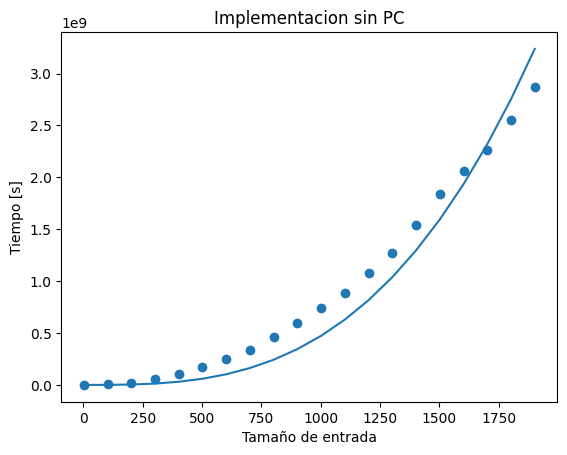

In [283]:
def n_cubo(x, a):
    return a * (x**3)

popt, pcov = curve_fit(n_cubo, df["n"], df["SPC"])
[a] = popt

plt.scatter(df["n"], df["SPC"])
plt.plot(df["n"], n_cubo(df["n"], a))
plt.title("Implementacion sin PC")
plt.xlabel("Tamaño de entrada")
plt.ylabel("Tiempo [s]")

<AxesSubplot: xlabel='n'>

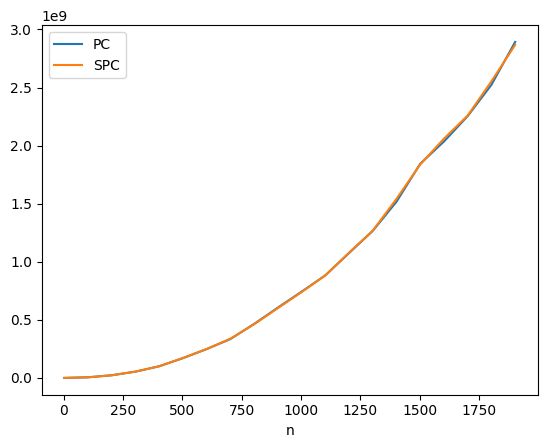

In [284]:
df.drop(columns="n^2").plot(x="n")